In [9]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import numpy as np



Training set shape: (60000, 28, 28)
Testing set shape: (10000, 28, 28)


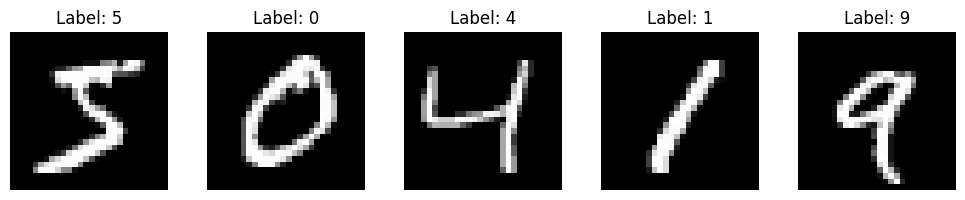

In [10]:

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print dataset shapes
print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

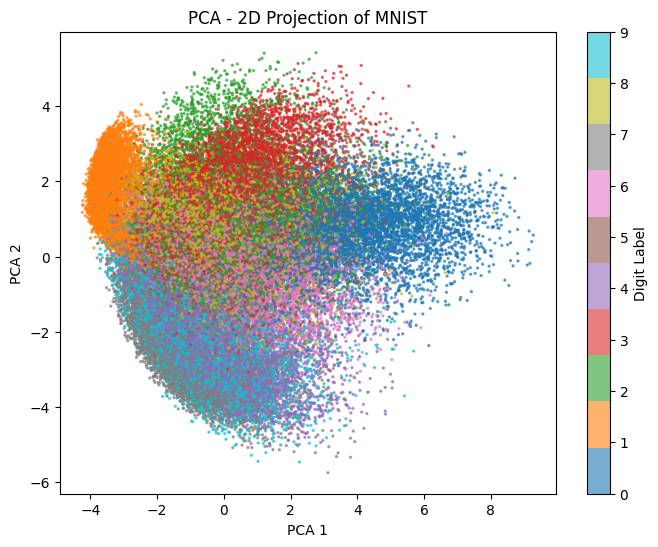

In [11]:
x_train_flat = x_train.reshape(x_train.shape[0], -1) / 255.0

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_flat)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1],
                      c=y_train, cmap='tab10', s=2, alpha=0.6)
plt.colorbar(scatter, label='Digit Label')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA - 2D Projection of MNIST")
plt.show()


Training SVM...
Training Random Forest...
Training Neural Network...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


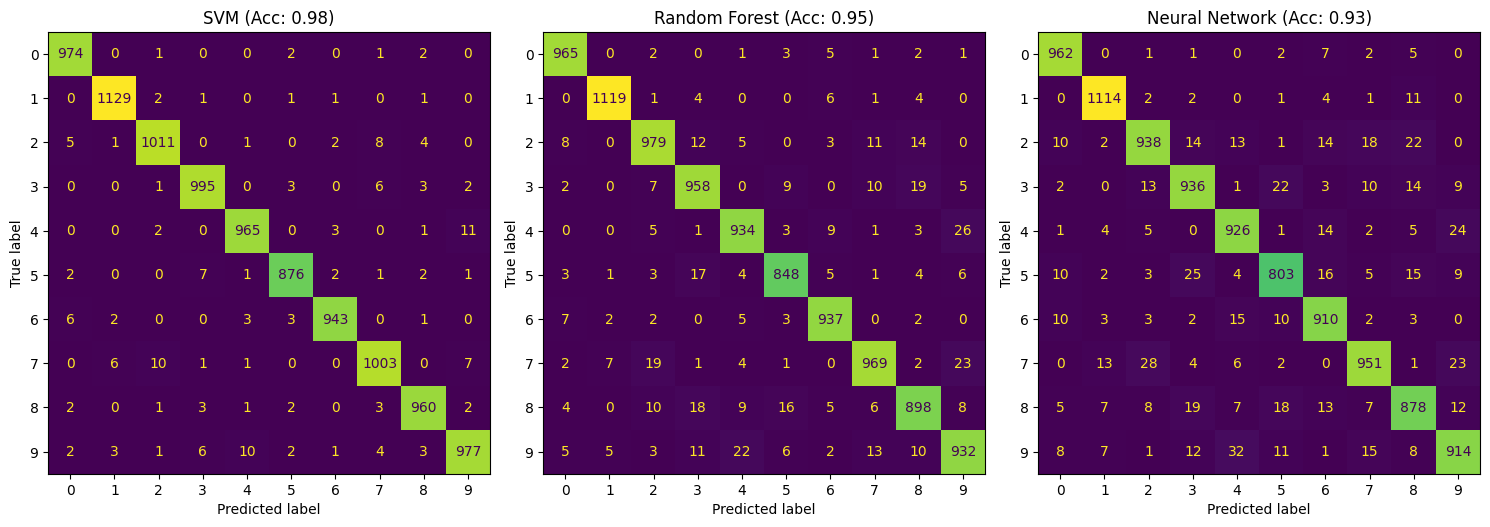

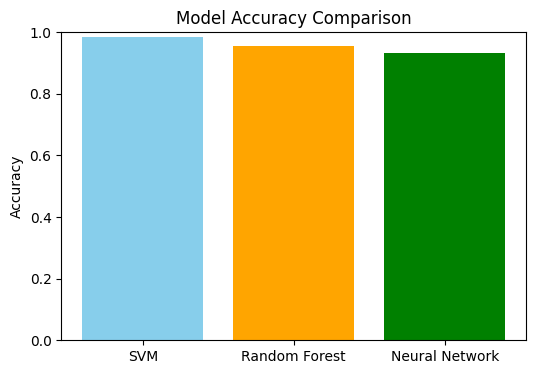

In [12]:
x_train_flat = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test_flat = x_test.reshape(x_test.shape[0], -1) / 255.0

pca = PCA(n_components=50)
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

models = {
    "SVM": SVC(kernel='rbf', gamma='scale'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=20, alpha=1e-4,
                                     solver='sgd', verbose=0, random_state=42)
}

results = {}
plt.figure(figsize=(15, 5))
for idx, (name, model) in enumerate(models.items(), start=1):
    print(f"Training {name}...")
    model.fit(x_train_pca, y_train)
    y_pred = model.predict(x_test_pca)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(1, 3, idx)
    ConfusionMatrixDisplay(cm).plot(ax=plt.gca(), colorbar=False)
    plt.title(f"{name} (Acc: {acc:.2f})")

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(results.keys(), results.values(), color=['skyblue', 'orange', 'green'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()
